In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import statistics
import category_encoders as ce

In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv(r'C:\Users\trucn\Documents\repositories\ds-mod-2-0924-code-solutions\clustering\clustering\imports-85.data', header = None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
# You should only input the column names that you need, not all of them!

## 1. Using 'price' and 'horsepower' columns from import-85.data, generate a KMeans model.

#### Find the optimal value of k using elbow method, silhouette score, and calinski-harabasz score.

In [6]:
# Price is column #25 and horsepower is column #21

#### Elbow method

In [7]:
#price_no_quests = df.drop(df[df[25] == '?'].index, inplace = True)

In [8]:
price_no_quests = df[df[25] != '?']

In [9]:
price_no_quests[25].dtype # Turns out price is an object type

dtype('O')

In [10]:
price_no_quests[25] = price_no_quests[25].astype(float)

C:\Users\trucn\AppData\Local\Temp\ipykernel_20892\3552352253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_no_quests[25] = price_no_quests[25].astype(float)


In [11]:
price_avg = round(statistics.mean(price_no_quests[25]))

In [12]:
df[25] = df[25].apply(lambda x: price_avg if x == '?' else x)

In [13]:
df[25] = df[25].astype(float)

In [14]:
horsepower_no_quests = df[df[21] != '?']

In [15]:
horsepower_no_quests[21] = horsepower_no_quests[21].astype(float)

C:\Users\trucn\AppData\Local\Temp\ipykernel_20892\314036083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horsepower_no_quests[21] = horsepower_no_quests[21].astype(float)


In [16]:
horsepower_avg = round(statistics.mean(horsepower_no_quests[21]))

In [17]:
df[21] = df[21].apply(lambda x: horsepower_avg if x == '?' else x)

In [18]:
df[21] = df[21].astype(float)

In [19]:
X = df[[25, 21]]

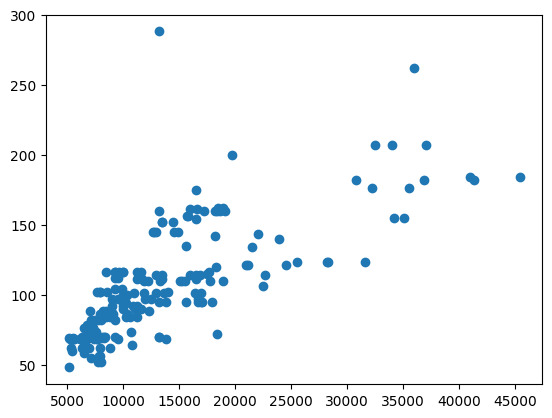

In [20]:
plt.scatter(df[25], df[21])

In [21]:
inertia = []
s_score = [] # Silhouette: Maximize this as close to 1
c_score = [] # Calinski-Harabasz: Maximize whichever's highest

for k in range (2, 11): # For k values between 2 and 10
    km = KMeans(n_clusters = k, n_init = 20)
    km.fit(X)
    inertia.append(km.inertia_)
    s_score.append(silhouette_score(X, km.labels_))
    c_score.append(calinski_harabasz_score(X, km.labels_))

In [22]:
inertia

[4032950231.0999994,
 1380286281.5292597,
 863513535.0102186,
 576608009.7600428,
 410728113.64532423,
 288936017.5230429,
 221214675.2142406,
 173380336.28682202,
 134464186.0943668]

In [23]:
s_score

[np.float64(0.721373863284664),
 np.float64(0.6556322296221346),
 np.float64(0.6003132158824057),
 np.float64(0.6092777186835676),
 np.float64(0.610379421214555),
 np.float64(0.5776010054085053),
 np.float64(0.5777829340679144),
 np.float64(0.5542963184768894),
 np.float64(0.5604529819400065)]

In [24]:
c_score

[np.float64(432.81065593055524),
 np.float64(823.2869666336585),
 np.float64(913.0771870788358),
 np.float64(1045.3274213766838),
 np.float64(1184.2052156661236),
 np.float64(1409.6696129036904),
 np.float64(1578.831248520372),
 np.float64(1760.4286904201867),
 np.float64(2013.6880193810687)]

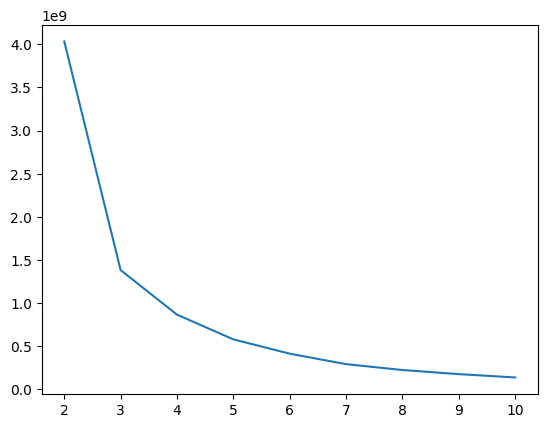

In [25]:
plt.plot(range(2, 11), inertia)

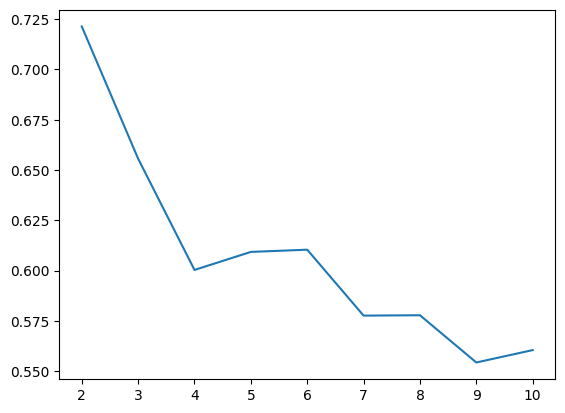

In [26]:
plt.plot(range(2, 11), s_score)

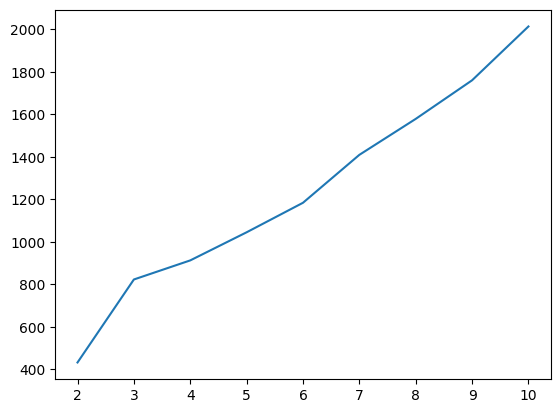

In [27]:
plt.plot(range(2, 11), c_score)

In [28]:
# Let's try k = 3

model = KMeans(n_clusters = 3)
model.fit_transform(X)

array([[5.12463789e+03, 3.19142478e+03, 2.15027880e+04],
       [8.12960678e+03, 1.87107396e+02, 1.84978044e+04],
       [8.12987585e+03, 1.88263039e+02, 1.84977015e+04],
       [5.57959091e+03, 2.73650076e+03, 2.10478202e+04],
       [9.07961505e+03, 7.63719228e+02, 1.75477961e+04],
       [6.87961222e+03, 1.43648842e+03, 1.97478003e+04],
       [9.33959681e+03, 1.02376647e+03, 1.72878164e+04],
       [1.05495919e+04, 2.23368586e+03, 1.60778261e+04],
       [1.55046636e+04, 7.18862859e+03, 1.11227482e+04],
       [4.83718865e+03, 3.47953455e+03, 2.17906939e+04],
       [8.05957700e+03, 2.57743719e+02, 1.85678420e+04],
       [8.55457565e+03, 2.40079768e+02, 1.80728462e+04],
       [1.25996152e+04, 4.28362251e+03, 1.40277983e+04],
       [1.27346146e+04, 4.41862236e+03, 1.38927994e+04],
       [1.61946016e+04, 7.87862029e+03, 1.04328365e+04],
       [2.23897787e+04, 1.40737233e+04, 4.23769075e+03],
       [3.29447066e+04, 2.46286780e+04, 6.31731468e+03],
       [2.85097304e+04, 2.01936

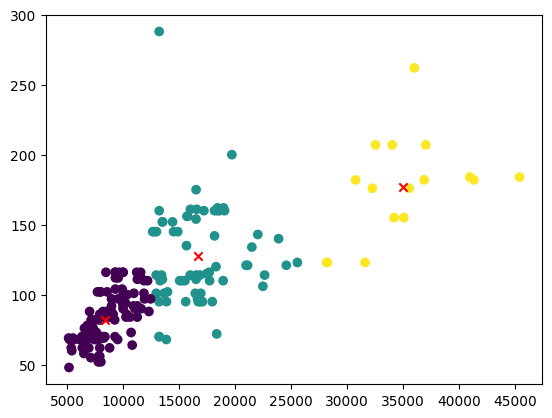

In [29]:
plt.scatter(X[25], X[21], c = model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'x', c = 'r')

In [30]:
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X), columns = X.columns)
X_scaled

,25,21
0,0.207959,0.262500
1,0.282558,0.262500
2,0.282558,0.441667
3,0.219254,0.225000
4,0.306142,0.279167
...,...,...
200,0.291123,0.275000
201,0.345738,0.466667
202,0.406311,0.358333
203,0.430763,0.241667


In [31]:
inertia_scaled = []
s_score_scaled = [] # Silhouette: Maximize this as close to 1
c_score_scaled = [] # Calinski-Harabasz: Maximize whichever's highest

for k in range (2, 11): # For k values between 2 and 10
    km_scaled = KMeans(n_clusters = k, n_init = 20)
    km_scaled.fit(X_scaled)
    inertia_scaled.append(km_scaled.inertia_)
    s_score_scaled.append(silhouette_score(X_scaled, km_scaled.labels_))
    c_score_scaled.append(calinski_harabasz_score(X_scaled, km_scaled.labels_))

In [32]:
model_scaled = KMeans(n_clusters = 3)
model_scaled.fit_transform(X_scaled)

array([[0.61858545, 0.17218947, 0.12292832],
       [0.55731496, 0.2307759 , 0.079071  ],
       [0.47197302, 0.35955515, 0.10557522],
       [0.63050316, 0.15723278, 0.14197051],
       [0.52844926, 0.25961524, 0.05927836],
       [0.58482883, 0.20268462, 0.09610154],
       [0.53622644, 0.25476015, 0.08048711],
       [0.51329864, 0.28170306, 0.08864897],
       [0.33862064, 0.45010898, 0.16715086],
       [0.54327094, 0.34598467, 0.16500256],
       [0.58462065, 0.21000648, 0.1199802 ],
       [0.57527225, 0.22139694, 0.11815633],
       [0.44481635, 0.34773226, 0.09526236],
       [0.44230063, 0.35068984, 0.09839689],
       [0.38222637, 0.42847467, 0.18139912],
       [0.09951111, 0.6906921 , 0.39816296],
       [0.17481069, 0.91307318, 0.63335579],
       [0.07177893, 0.81677382, 0.53148307],
       [0.94111567, 0.16435035, 0.45479363],
       [0.86261501, 0.07530301, 0.36979063],
       [0.8569926 , 0.07010889, 0.36464308],
       [0.88204989, 0.09455953, 0.38876215],
       [0.

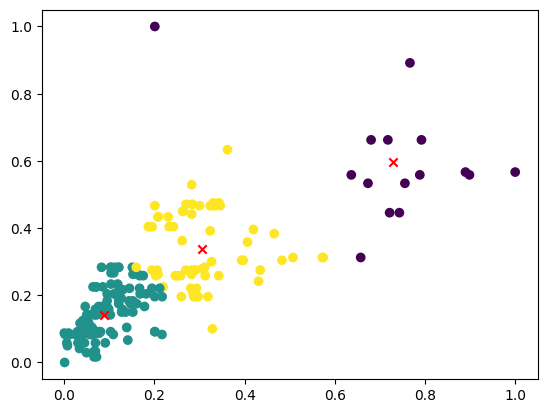

In [33]:
plt.scatter(X_scaled[25], X_scaled[21], c = model_scaled.labels_)
plt.scatter(model_scaled.cluster_centers_[:,0], model_scaled.cluster_centers_[:,1], marker = 'x', c = 'r')

# 2. Using 'price' and 'horsepower' columns from import-85.data, generate a DBSCAN model.

#### Plot your results to visualize outliers.

In [34]:
dbs = DBSCAN(eps = 0.1057825, min_samples = 7)
dbs.fit(X_scaled)

DBSCAN(eps=0.1057825, min_samples=7)

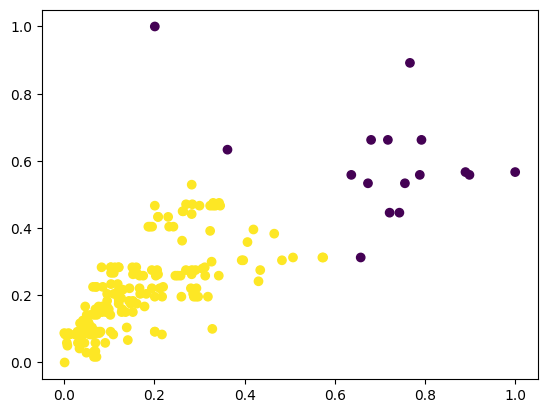

In [35]:
plt.scatter(X_scaled[25], X_scaled[21], c = dbs.labels_)

In [36]:
dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

In [37]:
labs = dbs.labels_

In [38]:
labs[dbs.core_sample_indices_] = 1

In [39]:
labs

array([ 1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,
        0,  0, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

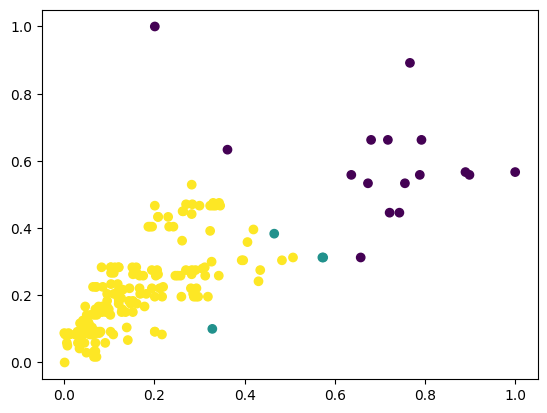

In [40]:
plt.scatter(X_scaled[25], X_scaled[21], c = labs)

# 3. Using mlb_batting_cleaned.csv, write a function that takes a player's name and shows the 2 closest players using the nearest neighbors algorithm.

In [41]:
mlb = pd.read_csv(r'C:\Users\trucn\Documents\repositories\ds-mod-2-0924-code-solutions\clustering\clustering\mlb_batting_cleaned.csv')

In [42]:
# Try utilizing np.where somewhere in thi

mlb

,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,CJ Abrams,21,WSN,NL,44,163,159,17,41,7,2,0,10,6,2,1,23,0.258,0.276,0.327,0.603,75,52,1,3,0,0,0
1,Albert Abreu,26,KCR,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0
2,José Abreu,35,CHW,AL,157,679,601,85,183,40,0,15,75,0,0,62,110,0.304,0.378,0.446,0.824,132,268,19,12,0,4,2
3,Ronald Acuna Jr.,24,ATL,NL,119,533,467,71,124,24,0,15,50,29,11,53,126,0.266,0.351,0.413,0.764,113,193,8,10,0,3,4
4,Willy Adames,26,MIL,NL,139,617,563,83,134,31,0,31,98,8,3,49,166,0.238,0.298,0.458,0.756,112,258,11,1,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,Juan Yepez,24,STL,NL,76,274,253,27,64,13,0,12,30,0,0,16,61,0.253,0.296,0.447,0.742,110,113,6,1,0,4,0
785,Jared Young,26,CHC,NL,6,22,19,2,5,2,0,0,0,1,0,3,7,0.263,0.364,0.368,0.732,108,7,0,0,0,0,0
786,Seby Zavala,28,CHW,AL,61,205,178,22,48,14,0,2,21,0,0,19,64,0.270,0.347,0.382,0.729,106,68,1,3,3,2,0
787,Bradley Zimmer,29,TOR,AL,23,14,13,3,1,0,0,0,2,1,1,0,8,0.077,0.143,0.077,0.220,-34,1,0,1,0,0,0


In [43]:
mlb2 = mlb.copy()

In [44]:
# OHE Tm column
ohe = ce.OneHotEncoder(use_cat_names = True)
ohe.fit(mlb2['Tm'])
tm_ohe = ohe.transform(mlb2['Tm'])

In [45]:
# OHE Lg column
ohe.fit(mlb2['Lg'])
lg_ohe = ohe.transform(mlb2['Lg'])

In [46]:
# Concat the newly-encoded columns into original dataframe

mlb2 = pd.concat([mlb2, tm_ohe, lg_ohe], axis = 1)

In [47]:
# Drop the two original columns that were encoded
mlb2 = mlb2.drop(columns = ['Tm', 'Lg'])

In [61]:
# Drop Name
mlb2 = mlb2.drop(columns = 'Name')

In [70]:
# Min-max scale all the columns
scaler = MinMaxScaler()
mlb2 = pd.DataFrame(scaler.fit_transform(mlb2), columns = mlb2.columns)

In [82]:
nn = NearestNeighbors(n_neighbors = 3)
nn.fit(mlb2)

NearestNeighbors(n_neighbors=3)

In [83]:
dist, indx = nn.kneighbors(mlb2)

In [84]:
dist

array([[0.00000000e+00, 4.02713502e-01, 4.38466038e-01],
       [0.00000000e+00, 6.21118012e-03, 4.54545455e-02],
       [5.96046448e-08, 8.21316851e-01, 8.27879728e-01],
       ...,
       [0.00000000e+00, 3.94376442e-01, 5.21806321e-01],
       [0.00000000e+00, 3.95597267e-01, 4.43038772e-01],
       [2.98023224e-08, 3.07648994e-01, 3.26510447e-01]])

In [85]:
indx

array([[  0, 116,   5],
       [  1, 664,  88],
       [  2, 740, 569],
       ...,
       [786, 108, 249],
       [787,  93, 362],
       [788,  76, 580]])

In [76]:
mlb.loc[mlb['Name'] == 'Shohei Ohtani'] # index 524

,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
524,Shohei Ohtani,27,LAA,AL,157,666,586,90,160,30,6,34,95,11,9,72,161,0.273,0.356,0.519,0.875,143,304,6,5,0,3,14


In [88]:
indx[524]

array([524, 726, 765])

In [89]:
mlb.iloc[726,:]

Name    Mike Trout
Age             30
Tm             LAA
Lg              AL
G              119
PA             499
AB             438
R               85
H              124
2B              28
3B               2
HR              40
RBI             80
SB               1
CS               0
BB              54
SO             139
BA           0.283
OBP          0.369
SLG           0.63
OPS          0.999
OPS+           175
TB             276
GDP              6
HBP              6
SH               0
SF               1
IBB              8
Name: 726, dtype: object

In [90]:
mlb.iloc[765,:]

Name    Taylor Ward
Age              28
Tm              LAA
Lg               AL
G               135
PA              564
AB              495
R                73
H               139
2B               22
3B                2
HR               23
RBI              65
SB                5
CS                3
BB               60
SO              120
BA            0.281
OBP            0.36
SLG           0.473
OPS           0.833
OPS+            133
TB              234
GDP               5
HBP               4
SH                0
SF                5
IBB               0
Name: 765, dtype: object

# Function that retrieves the two closest players

In [138]:
def nearest_two_players(data, player_name):
    
    # Get the list of all player names saved separately and the index of the specific player inputted
    player_names_list = data['Name']
    player_name_index = data[data['Name'] == player_name].index.values.astype(int)[0]
    
    # OHE Tm and Lg
    ohe = ce.OneHotEncoder(use_cat_names = True)
    ohe.fit(data['Tm'])
    tm_ohe = ohe.transform(data['Tm'])

    ohe.fit(data['Lg'])
    lg_ohe = ohe.transform(data['Lg'])

    # Concat the encoded Tm and Lg columns to original dataframe
    data = pd.concat([data, tm_ohe, lg_ohe], axis = 1)
    
    # Drop Name, Tm, and Lg
    data = data.drop(columns = ['Name', 'Tm', 'Lg'])

    # Min-max scale the columns
    scal = MinMaxScaler()
    data = pd.DataFrame(scal.fit_transform(data), columns = data.columns)
    
    # Build the model
    nn = NearestNeighbors(n_neighbors = 3)
    nn.fit(data)
    
    # Get dist and indx
    dist, indx = nn.kneighbors(data)
    
    # Index 0 is the original player's name, index 1 is the first match, and index 2 is the second match
    two_matches = indx[player_name_index]

    print(f"Input player name: {player_names_list[player_name_index]}")
    print(f"The first closest player: {player_names_list[two_matches[1]]}")
    print(f"The second closest player: {player_names_list[two_matches[2]]}")
    

In [139]:
nearest_two_players(mlb, 'Shohei Ohtani')

Input player name: Shohei Ohtani
The first closest player: Mike Trout
The second closest player: Taylor Ward


# Testing code to make function

In [117]:
player_name_index  = mlb[mlb['Name'] == 'Shohei Ohtani'].index.values.astype(int)[0]

In [120]:
two_matches = indx[player_name_index]

In [124]:
two_matches[0]

np.int64(524)

In [125]:
two_matches[1]

np.int64(726)

In [126]:
two_matches[2]

np.int64(765)

In [127]:
player_names_list = mlb['Name']

In [132]:
player_names_list.iloc[two_matches[2]]

'Taylor Ward'